In [5]:
# imports

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [6]:
# define the network class

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
# load the model if needed
model = Net()
model.load_state_dict(torch.load("model.pt"))
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

{0: -7.35, 1: 5.95, 2: 6.73, 3: 6.47, 4: -7.38, 5: -5.84, 6: -14.97, 7: 14.34, 8: 2.65, 9: -0.58}
7


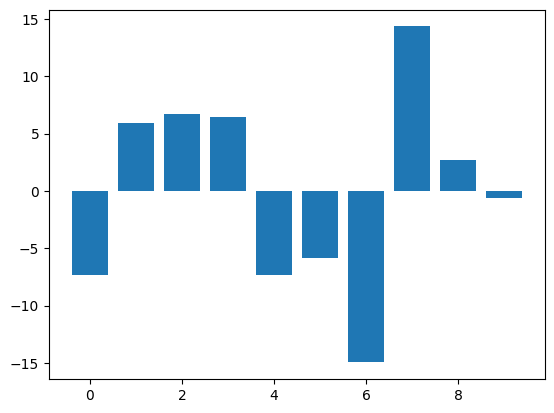

In [8]:
import csv

user_input = []
with open('user_input.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        for i in range(0, len(row)):
            row[i] = float(row[i])/255
        user_input.append(row)

user_input = torch.tensor(user_input)

prediction = model.forward(user_input[0])

# print prediction as dictionary of index: value to 2sf (rounded)
prediction_dict = {}
for i in range(0, len(prediction)):
    prediction_dict[i] = round(prediction[i].item(), 2)
print(prediction_dict)

# bar chart of prediction
plt.bar(range(len(prediction_dict)), list(prediction_dict.values()), align='center')


# print index of max value
print(torch.argmax(prediction).item())
